# Investigacion Exploratoria - Datos Socioeconomicos en Contexto de Pandemia 

Este análisis preliminar examina el impacto de la pandemia en ingresos y pobreza (2017-2023), comparando la evolución de comunas de altos y bajos recursos. Se identifican patrones de recuperación y vulnerabilidad desde la pre-pandemia, pandemia y los que persisten post-crisis.

Primero leemos los datos

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os


In [ ]:
ruta = os.path.join('..', '..', 'Data', 'Nivel socioeconomico y geografico', 'Dataset_Socio_RM.csv')
df = pd.read_csv(ruta)

## Analisis Ingresos Por Comuna En RM

Buscamos las top 10 comunas con mayores ingresos y menores ingresos, de los años pre-pandemia, pandemia y post-pandemia .

In [4]:
# Definir los períodos
periodos = {
    'Pre-pandemia (2017-2018)': [2017, 2018],
    'Pandemia (2020-2021)': [2020, 2021],
    'Post-pandemia (2022-2023)': [2022, 2023]
}

# Crear un DataFrame para almacenar resultados
resultados_top = {}
resultados_bottom = {}

# Analizar cada período
for periodo_name, años in periodos.items():
    # Filtrar datos del período
    df_periodo = df[df['Año'].isin(años)]
    
    # Top 10 comunas con mayores ingresos
    top_10 = df_periodo.groupby('Comuna')['Ingreso_hogar'].mean().nlargest(10)
    
    # Top 10 comunas con menores ingresos
    bottom_10 = df_periodo.groupby('Comuna')['Ingreso_hogar'].mean().nsmallest(10)
    
    resultados_top[periodo_name] = top_10
    resultados_bottom[periodo_name] = bottom_10
    
    print(f"\n{periodo_name}:")
    print(f"Top 10 mayores ingresos: {list(top_10.index)}")
    print(f"Top 10 menores ingresos: {list(bottom_10.index)}")


Pre-pandemia (2017-2018):
Top 10 mayores ingresos: ['Vitacura', 'Las Condes', 'Providencia', 'La Reina', 'Lo Barnechea', 'Ñuñoa', 'Peñalolén', 'Pirque', 'San Miguel', 'Lampa']
Top 10 menores ingresos: ['Curacaví', 'La Pintana', 'María Pinto', 'Melipilla', 'San Pedro', 'El Monte', 'Lo Prado', 'San Ramón', 'La Granja', 'San Joaquín']

Pandemia (2020-2021):
Top 10 mayores ingresos: ['Vitacura', 'Lo Barnechea', 'Las Condes', 'Providencia', 'Ñuñoa', 'La Reina', 'Huechuraba', 'San Miguel', 'Peñalolén', 'La Cisterna']
Top 10 menores ingresos: ['María Pinto', 'Colina', 'San Pedro', 'San Ramón', 'Cerro Navia', 'Lo Espejo', 'Pedro Aguirre Cerda', 'La Pintana', 'El Bosque', 'Lampa']

Post-pandemia (2022-2023):
Top 10 mayores ingresos: ['Vitacura', 'Lo Barnechea', 'Las Condes', 'Providencia', 'La Reina', 'Ñuñoa', 'Peñalolén', 'San Miguel', 'Pirque', 'Macul']
Top 10 menores ingresos: ['La Pintana', 'María Pinto', 'La Granja', 'Conchalí', 'Renca', 'El Monte', 'Lo Prado', 'El Bosque', 'Lo Espejo', '

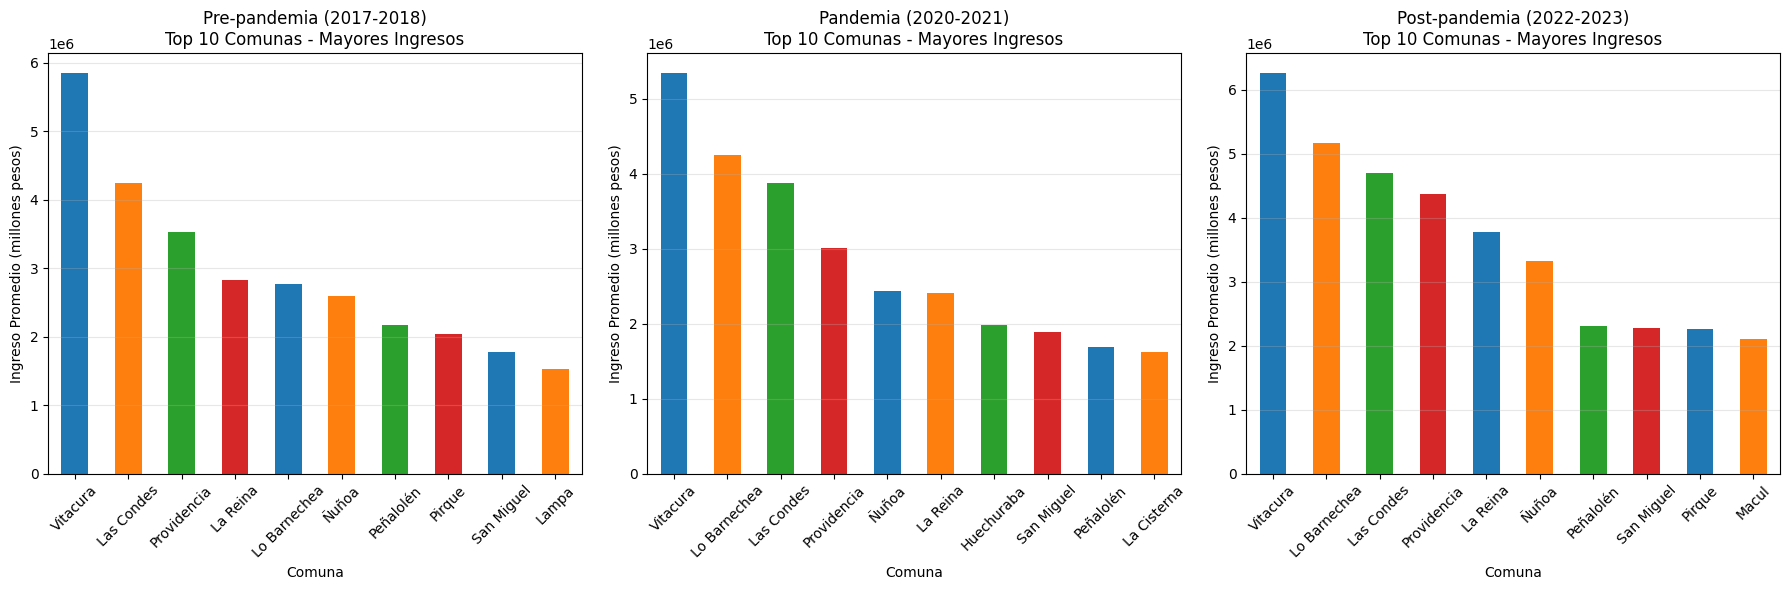

In [5]:
# Preparar datos para el gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (periodo_name, top_10) in enumerate(resultados_top.items()):
    top_10.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:10])
    axes[i].set_title(f'{periodo_name}\nTop 10 Comunas - Mayores Ingresos')
    axes[i].set_ylabel('Ingreso Promedio (millones pesos)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Un vistazo general sobre las comunas con mayores ingresos a lo largo de los periodos pre-pandemia, pandemia y post-pandemia.

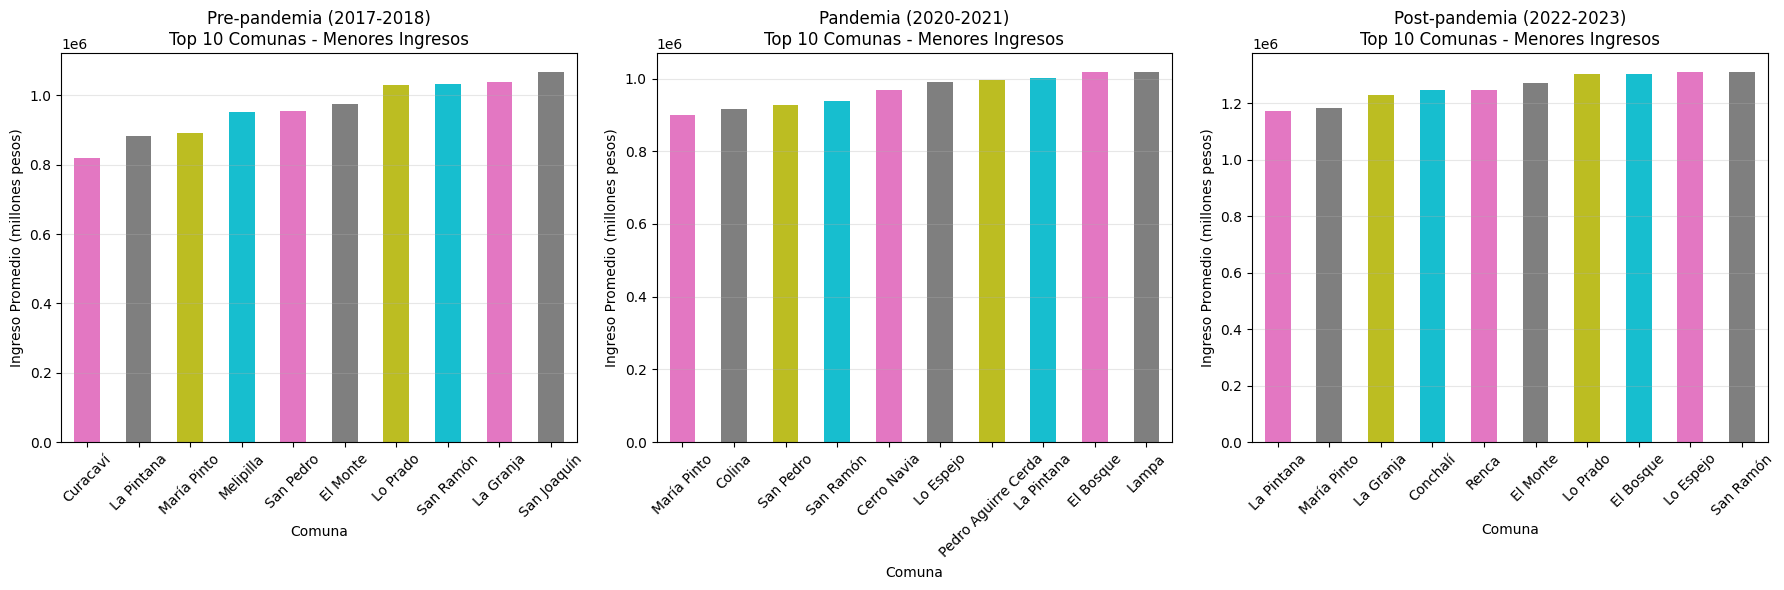

In [6]:
# Gráfico para menores ingresos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (periodo_name, bottom_10) in enumerate(resultados_bottom.items()):
    bottom_10.plot(kind='bar', ax=axes[i], color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:10])
    axes[i].set_title(f'{periodo_name}\nTop 10 Comunas - Menores Ingresos')
    axes[i].set_ylabel('Ingreso Promedio (millones pesos)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Un vistazo general sobre las comunas con menores ingresos a lo largo de los periodos pre-pandemia, pandemia y post-pandemia.

### Analisis Exploratorio para Evolución de Ingresos - Comunas con mayores ingresos (2017-2023)

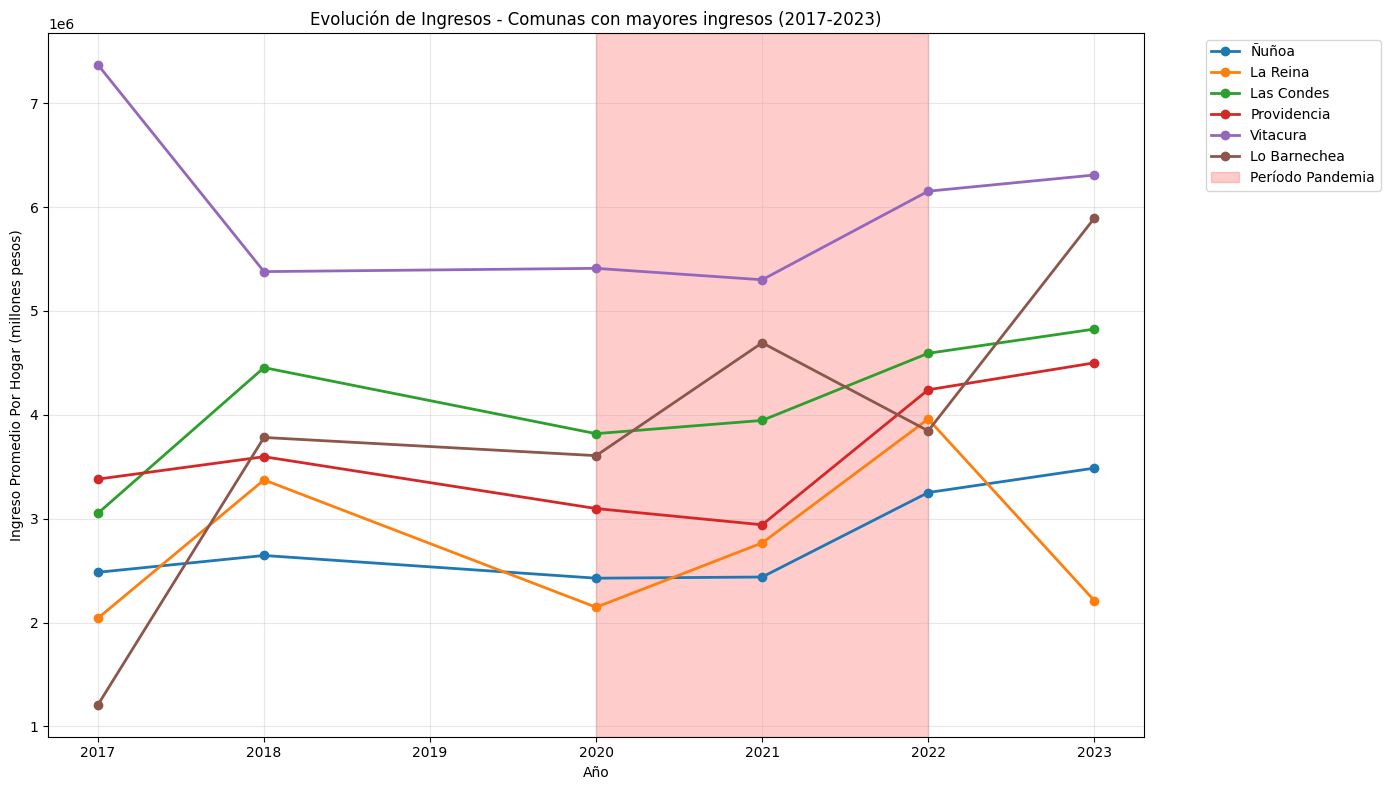

In [10]:
# Identificar comunas que aparecen en múltiples períodos
comunas_destacadas = set()
for periodo in resultados_top.values():
    comunas_destacadas.update(periodo.index[:5])

# Gráfico de evolución temporal
plt.figure(figsize=(14, 8))
for comuna in list(comunas_destacadas)[:8]:
    evolucion = df[df['Comuna'] == comuna].groupby('Año')['Ingreso_hogar'].mean()
    plt.plot(evolucion.index, evolucion.values, marker='o', label=comuna, linewidth=2)

plt.axvspan(2020, 2022, alpha=0.2, color='red', label='Período Pandemia')
plt.xlabel('Año')
plt.ylabel('Ingreso Promedio Por Hogar (millones pesos)')
plt.title('Evolución de Ingresos - Comunas con mayores ingresos (2017-2023)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Se observa que las comunas con mayores niveles de ingreso experimentaron una leve disminución en el ingreso promedio por hogar al inicio de la pandemia, en comparación con los años previos. En particular, durante el periodo 2020-2021 de la pandemia se evidenció una caída leve en comunas como Vitacura y Providencia. En contraste, comunas como La Reina, Las Condes y Lo Barnechea mostraron un aumento considerable en sus ingresos.

No obstante, entre 2021 y 2023 se registró una tendencia inversa: las comunas que habían presentado un alza significativa durante 2020-2021 de la pandemia sufrieron posteriormente una disminución en sus ingresos por hogar, como fue el caso de La Reina(2022) y Lo Barnechea(2021).

Es importante aclarar que de ser necesario, para el desarrollo futuro de este proyecto, se realizará un análisis más profundo de las fuentes de ingreso. Probablemente será necesario adquirir información adicional mediante fuentes de datos pertinentes, con el fin de estudiar con mayor detalle este fenómeno.

### Analisis Exploratorio para Evolución de Ingresos - Comunas con Menores ingresos (2017-2023)

Comunas consistentemente entre las 5 más pobres:
{'San Pedro', 'María Pinto', 'Melipilla', 'Curacaví', 'La Granja', 'San Ramón', 'Cerro Navia', 'Renca', 'Colina', 'La Pintana', 'Conchalí'}


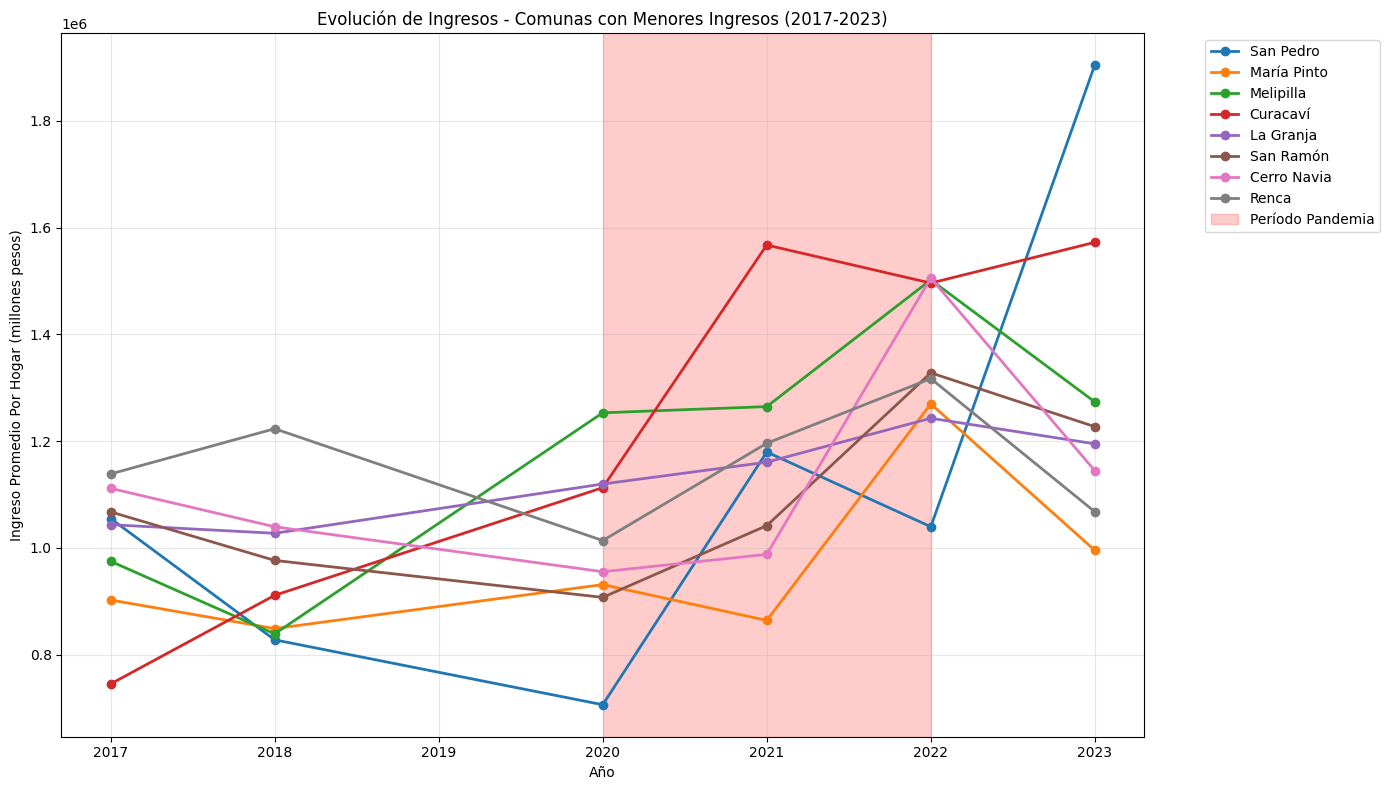

In [ ]:
# Identificar comunas que aparecen en múltiples períodos (menores ingresos)
comunas_pobres_destacadas = set()
for periodo in resultados_bottom.values():
    comunas_pobres_destacadas.update(periodo.index[:5])

print("Comunas consistentemente entre las 5 más pobres:")
print(comunas_pobres_destacadas)

# Gráfico de evolución temporal para comunas pobres
plt.figure(figsize=(14, 8))
for comuna in list(comunas_pobres_destacadas)[:8]:
    evolucion = df[df['Comuna'] == comuna].groupby('Año')['Ingreso_hogar'].mean()
    plt.plot(evolucion.index, evolucion.values, marker='o', label=comuna, linewidth=2, markersize=6)

plt.axvspan(2020, 2022, alpha=0.2, color='red', label='Período Pandemia')
plt.xlabel('Año')
plt.ylabel('Ingreso Promedio Por Hogar (millones pesos)')
plt.title('Evolución de Ingresos - Comunas con Menores Ingresos (2017-2023)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Se observa que la mayoría de las comunas con menores niveles de ingreso en la Región Metropolitana experimentaron un aumento en sus ingresos promedio durante el inicio de la pandemia (año 2020), con excepción de María Pinto. Este comportamiento podría deberse a que María Pinto corresponde a una comuna de carácter más rural y con un acceso más limitado a centros urbanos, lo que habría dificultado los procesos de reinvención económica en un contexto donde el comercio electrónico y las actividades digitales aumentaron considerablemente.

En contraste, las comunas de carácter más urbano pudieron adaptarse con mayor facilidad gracias a su mejor conectividad y acceso a recursos tecnológicos, lo que favoreció una recuperación más sostenida de sus ingresos. Sin embargo, a partir del año 2021, María Pinto experimentó un aumento significativo en sus ingresos por hogar. Asimismo, la mayoría de las comunas, con excepción de San Pedro, mantuvieron un crecimiento en los ingresos por hogar hasta el año 2022.

Es importante aclarar que de ser necesario, para el desarrollo futuro de este proyecto, se realizará un análisis más profundo de las fuentes de ingreso. Probablemente será necesario adquirir información adicional mediante fuentes de datos pertinentes, con el fin de estudiar con mayor detalle este fenómeno.

### Obsevacion entre Ambas Evoluciones
Se aprecia que las comunas de mayores ingresos presentaron una evolución más estable y sostenida en el tiempo, mientras que las comunas de menores ingresos mostraron variaciones más pronunciadas. Esto podría explicarse por el hecho de que, durante el contexto de pandemia, las comunas con menores recursos se vieron más afectadas por la necesidad de generar nuevas fuentes de ingreso, lo que provocó fluctuaciones más marcadas en sus niveles de ingreso promedio.

## Analisis Pobreza Comuna en Contexto Pandemia

Ahora veremos los datos de pobreza por comuna y si hubo algun cambio en la pandemia 

In [127]:
print("Valores únicos en Pobreza Categoria:")
print(df['Pobreza Categoria'].unique())
print("\nDistribución:")
print(df['Pobreza Categoria'].value_counts())
print("\nDistribución porcentual:")
print(df['Pobreza Categoria'].value_counts(normalize=True) * 100)

Valores únicos en Pobreza Categoria:
['No Pobreza' 'Pobreza No Extrema' 'Pobreza Extrema']

Distribución:
Pobreza Categoria
No Pobreza            107812
Pobreza No Extrema      4729
Pobreza Extrema         2498
Name: count, dtype: int64

Distribución porcentual:
Pobreza Categoria
No Pobreza            93.717783
Pobreza No Extrema     4.110780
Pobreza Extrema        2.171438
Name: proportion, dtype: float64


In [128]:
# Comunas con mayor pobreza extrema
pobreza_extrema_comunas = df.groupby('Comuna')['Pobreza Categoria'].apply(
    lambda x: (x == 'Pobreza Extrema').mean() * 100
).round(2).sort_values(ascending=False)

print("Top 10 comunas con mayor Pobreza Extrema:")
print(pobreza_extrema_comunas.head(10))

# Comunas con mayor pobreza no extrema
pobreza_no_extrema_comunas = df.groupby('Comuna')['Pobreza Categoria'].apply(
    lambda x: (x == 'Pobreza No Extrema').mean() * 100
).round(2).sort_values(ascending=False)

print("\nTop 10 comunas con mayor Pobreza No Extrema:")
print(pobreza_no_extrema_comunas.head(10))

# Comunas con menor pobreza (más "No Pobreza")
no_pobreza_comunas = df.groupby('Comuna')['Pobreza Categoria'].apply(
    lambda x: (x == 'No Pobreza').mean() * 100
).round(2).sort_values(ascending=False)

print("\nTop 10 comunas con menor pobreza:")
print(no_pobreza_comunas.head(10))

Top 10 comunas con mayor Pobreza Extrema:
Comuna
Cerrillos              4.46
Peñaflor               3.87
Independencia          3.80
María Pinto            3.55
El Bosque              3.50
Pedro Aguirre Cerda    3.45
Padre Hurtado          3.44
Curacaví               3.38
Santiago               3.30
Colina                 3.15
Name: Pobreza Categoria, dtype: float64

Top 10 comunas con mayor Pobreza No Extrema:
Comuna
La Pintana       11.45
San Pedro        10.53
Independencia     9.26
María Pinto       8.19
El Bosque         6.72
San Ramón         6.55
El Monte          6.54
Conchalí          6.39
San Bernardo      5.88
Lo Espejo         5.87
Name: Pobreza Categoria, dtype: float64

Top 10 comunas con menor pobreza:
Comuna
Vitacura        99.53
Providencia     98.70
Las Condes      98.57
Ñuñoa           98.11
La Reina        97.46
Lo Barnechea    96.06
Alhué           95.54
Pirque          95.32
San Miguel      95.18
Peñalolén       94.99
Name: Pobreza Categoria, dtype: float64


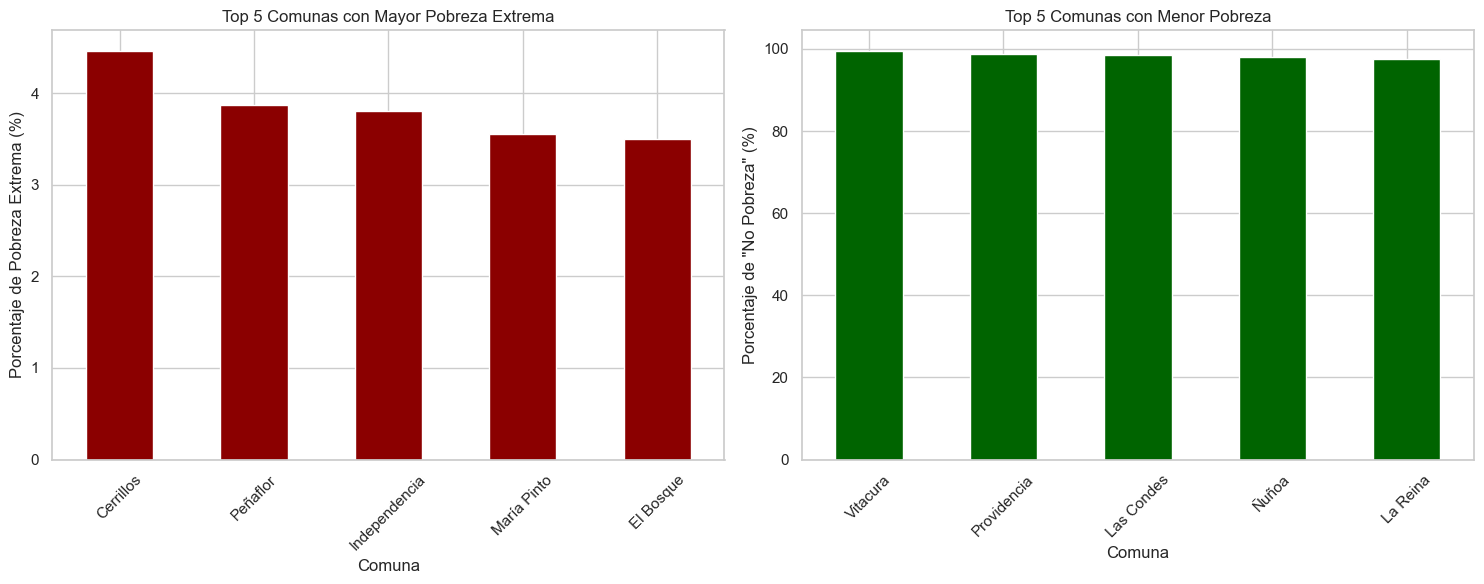

In [129]:
top_5_extrema = pobreza_extrema_comunas.head(5)
top_5_no_pobreza = no_pobreza_comunas.head(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de pobreza extrema
top_5_extrema.plot(kind='bar', ax=ax1, color='darkred')
ax1.set_title('Top 5 Comunas con Mayor Pobreza Extrema')
ax1.set_ylabel('Porcentaje de Pobreza Extrema (%)')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de no pobreza
top_5_no_pobreza.plot(kind='bar', ax=ax2, color='darkgreen')
ax2.set_title('Top 5 Comunas con Menor Pobreza')
ax2.set_ylabel('Porcentaje de "No Pobreza" (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Apreciacion general de las comunas con menos pobreza y mas extrema pobreza

In [ ]:
# Definir períodos claros
periodos = {
    'Pre-pandemia': [2017, 2018],
    'Pandemia': [2020, 2021],
    'Post-pandemia': [2022, 2023]
}

# Calcular tasas por período
resultados_periodos = {}

for periodo_name, años in periodos.items():
    df_periodo = df[df['Año'].isin(años)]
    
    total = len(df_periodo)
    pobreza_extrema = (df_periodo['Pobreza Categoria'] == 'Pobreza Extrema').sum()
    pobreza_no_extrema = (df_periodo['Pobreza Categoria'] == 'Pobreza No Extrema').sum()
    no_pobreza = (df_periodo['Pobreza Categoria'] == 'No Pobreza').sum()
    
    resultados_periodos[periodo_name] = {
        'Pobreza_Extrema_%': (pobreza_extrema / total) * 100,
        'Pobreza_No_Extrema_%': (pobreza_no_extrema / total) * 100,
        'Pobreza_Total_%': ((pobreza_extrema + pobreza_no_extrema) / total) * 100,
        'No_Pobreza_%': (no_pobreza / total) * 100,
        'Total_Observaciones': total
    }

# Crear DataFrame de resultados
df_resultados = pd.DataFrame(resultados_periodos).T.round(2)
print("IMPACTO DE LA PANDEMIA EN LA POBREZA:")
print("=" * 55)
print(df_resultados)

IMPACTO DE LA PANDEMIA EN LA POBREZA:
               Pobreza_Extrema_%  Pobreza_No_Extrema_%  Pobreza_Total_%  \
Pre-pandemia                1.48                  3.67             5.15   
Pandemia                    3.71                  5.31             9.01   
Post-pandemia               1.32                  3.35             4.67   

               No_Pobreza_%  Total_Observaciones  
Pre-pandemia          94.85              39606.0  
Pandemia              90.99              38354.0  
Post-pandemia         95.33              37079.0  


### Analisis Exploratorio Evolucion de la Pobreza en chile En Contexto pandemia.

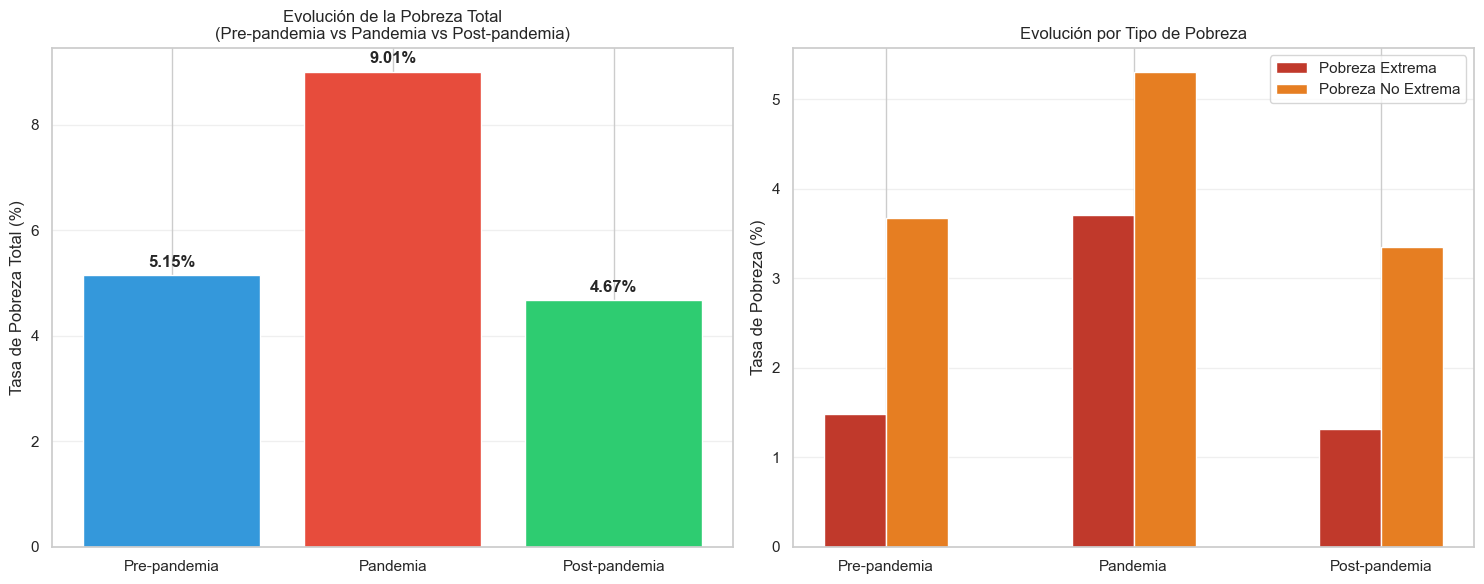

In [131]:
# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Pobreza Total
pobreza_total = [df_resultados.loc[periodo, 'Pobreza_Total_%'] for periodo in periodos.keys()]
periodos_nombres = list(periodos.keys())

ax1.bar(periodos_nombres, pobreza_total, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_title('Evolución de la Pobreza Total\n(Pre-pandemia vs Pandemia vs Post-pandemia)')
ax1.set_ylabel('Tasa de Pobreza Total (%)')
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(pobreza_total):
    ax1.text(i, v + 0.1, f'{v}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Desglose por tipo de pobreza
ancho = 0.25
x = np.arange(len(periodos_nombres))

pobreza_extrema = [df_resultados.loc[periodo, 'Pobreza_Extrema_%'] for periodo in periodos_nombres]
pobreza_no_extrema = [df_resultados.loc[periodo, 'Pobreza_No_Extrema_%'] for periodo in periodos_nombres]

ax2.bar(x - ancho/2, pobreza_extrema, ancho, label='Pobreza Extrema', color='#c0392b')
ax2.bar(x + ancho/2, pobreza_no_extrema, ancho, label='Pobreza No Extrema', color='#e67e22')
ax2.set_title('Evolución por Tipo de Pobreza')
ax2.set_ylabel('Tasa de Pobreza (%)')
ax2.set_xticks(x)
ax2.set_xticklabels(periodos_nombres)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

 El análisis evidencia un incremento de 3,86 puntos porcentuales en la tasa de pobreza durante el período de pandemia en Chile. Este fenómeno puede atribuirse a factores que afectaron desproporcionadamente a los estratos socioeconómicos más vulnerables. La concentración de la fuerza laboral de menores ingresos en ocupaciones no calificadas y de alta presencialidad -como construcción, servicios de limpieza y logística- las expuso a mayores riesgos de interrupción laboral, impactando directamente en los ingresos familiares.

Adicionalmente, la significativa dependencia de empleos informales y temporales dentro de estos segmentos poblacionales exacerbó la vulnerabilidad, al carecer de mecanismos formales de protección laboral que mitigaran la pérdida de fuentes de ingreso. Coherente con esta dinámica, se observa un aumento simultáneo en ambas categorías de pobreza -extrema y no extrema- durante los años de pandemia, reflejando un deterioro generalizado en las condiciones de vida de la población más vulnerable.

### Analisis de pobreza por Año


EVOLUCIÓN AÑO POR AÑO:
      Pobreza_Total_%  Pobreza_Extrema_%  Pobreza_No_Extrema_%
Año                                                           
2017             6.05           1.654823              4.397953
2018             4.21           1.293435              2.915362
2020             9.15           3.637256              5.516133
2021             8.82           3.806359              5.010347
2022             4.43           1.248445              3.178698
2023             5.02           1.431174              3.584439


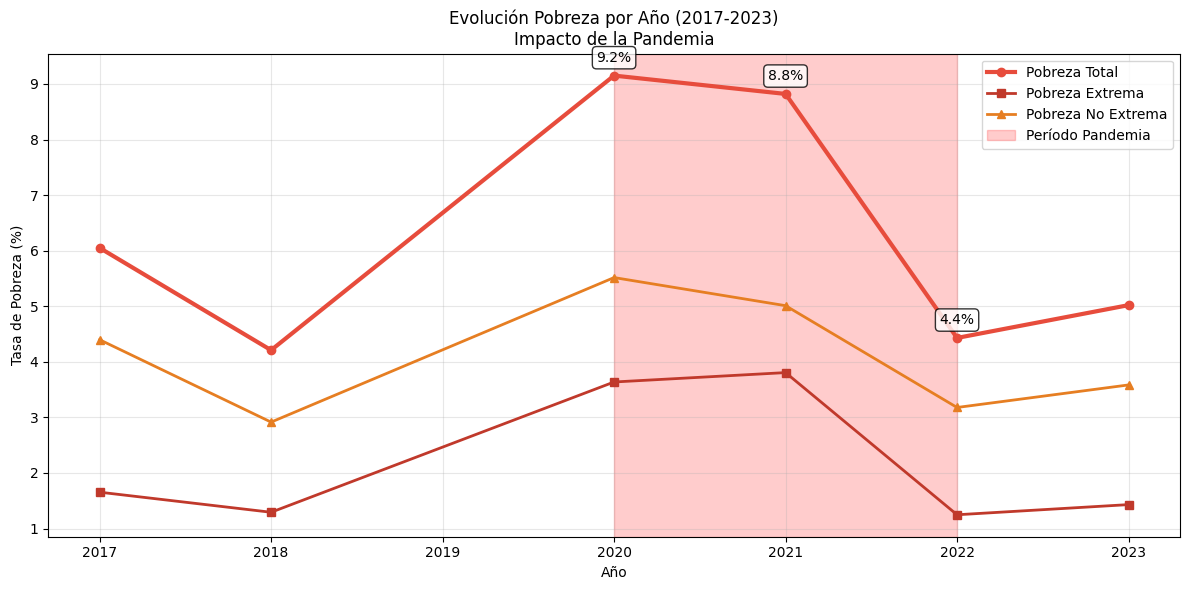

In [9]:
# Evolución año por año
evolucion_anual = df.groupby('Año').agg({
    'Pobreza Categoria': lambda x: ((x == 'Pobreza Extrema') | (x == 'Pobreza No Extrema')).mean() * 100
}).round(2)
evolucion_anual.columns = ['Pobreza_Total_%']

# Añadir desglose
for año in df['Año'].unique():
    df_año = df[df['Año'] == año]
    evolucion_anual.loc[año, 'Pobreza_Extrema_%'] = (df_año['Pobreza Categoria'] == 'Pobreza Extrema').mean() * 100
    evolucion_anual.loc[año, 'Pobreza_No_Extrema_%'] = (df_año['Pobreza Categoria'] == 'Pobreza No Extrema').mean() * 100

print("\nEVOLUCIÓN AÑO POR AÑO:")

print(evolucion_anual)

# Gráfico de líneas detallado
plt.figure(figsize=(12, 6))
plt.plot(evolucion_anual.index, evolucion_anual['Pobreza_Total_%'], 
         marker='o', linewidth=3, label='Pobreza Total', color='#e74c3c')
plt.plot(evolucion_anual.index, evolucion_anual['Pobreza_Extrema_%'], 
         marker='s', linewidth=2, label='Pobreza Extrema', color='#c0392b')
plt.plot(evolucion_anual.index, evolucion_anual['Pobreza_No_Extrema_%'], 
         marker='^', linewidth=2, label='Pobreza No Extrema', color='#e67e22')

# Destacar período pandemia
plt.axvspan(2020, 2022, alpha=0.2, color='red', label='Período Pandemia')

plt.title('Evolución Pobreza por Año (2017-2023)\nImpacto de la Pandemia')
plt.ylabel('Tasa de Pobreza (%)')
plt.xlabel('Año')
plt.grid(True, alpha=0.3)
plt.legend()

# Añadir valores en los puntos clave
for año in [2019, 2020, 2021, 2022]:
    if año in evolucion_anual.index:
        plt.annotate(f'{evolucion_anual.loc[año, "Pobreza_Total_%"]:.1f}%', 
                    (año, evolucion_anual.loc[año, "Pobreza_Total_%"]),
                    textcoords="offset points", xytext=(0,10), ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

El análisis temporal revela que el punto máximo de pobreza total se registró en 2020, alcanzando un 9.2% durante el período más crítico de la pandemia. Posteriormente, se observa una tendencia descendente que se acentúa notablemente en 2022, cuando la tasa se reduce a 4.4%, representando una disminución de aproximadamente el 52% respecto al pick de la pandemia (2020).

Esta evolución puede atribuirse a la reactivación progresiva del mercado laboral presencial gracias a las politicas publicas como la vacunacion o protocolos de salud, sector donde se concentra significativamente la ocupación de los estratos socioeconómicos más vulnerables. La limitada capacidad de estos segmentos poblacionales para acceder a empleos remotos -dada su menor formación profesional y especialización- exacerbó su vulnerabilidad durante las restricciones sanitarias. La recuperación de actividades económicas presenciales permitió la reinserción laboral de esta población, reflejándose en la notable reducción de las tasas de pobreza desde el 2021 y 2022.

La marcada disminución entre 2021 y 2022 sugiere que los efectos más severos de la crisis covid-19 sobre la pobreza fueron temporalmente contenidos mediante la reactivación económica, aunque persisten desafíos estructurales en la vulnerabilidad laboral de los estratos menos calificados, puesto que aumento ligeramente en entre el año 2022 al 2023.


## Conclusion del Analisis Exploratorio
El estudio exploratorio evidencia un impacto diferenciado de la pandemia según estratos socioeconómicos, revelando profundas desigualdades estructurales en la Región Metropolitana.

Principales hallazgos:

1. Divergencia en la evolución de ingresos: Las comunas de mayores ingresos mostraron patrones mas constantes, con algunas experimentando aumentos durante la pandemia (La Reina, Las Condes) mientras otras enfrentaron disminuciones (Vitacura, Providencia). En contraste, las comunas de menores ingresos presentaron mayor volatilidad, con recuperaciones sostenidas excepto en casos de desconexión territorial como María Pinto.

2. Vulnerabilidad laboral: El incremento de **3.86 puntos porcentuales** en pobreza durante la pandemia refleja la precariedad estructural de los estratos más vulnerables, cuya dependencia de empleos presenciales no calificados y del sector informal los expuso desproporcionadamente a las restricciones sanitarias.

3. La notable reducción de pobreza a 4.4% en 2022 (-52% desde el pick de 2020) demuestra la efectividad de la reactivación presencial para los sectores más afectados. Sin embargo, el leve repunte en 2023 sugiere que las mejoras pueden ser frágiles ante la persistencia de vulnerabilidades estructurales.